# 문제정의

NBA 농구 선수들의 게임 데이터를 사용하여 특정 농구 선수의 포지션을 예측한다

# 데이터 획득

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/csv/basketball_stat.csv')

In [3]:
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


## 데이터 컬럼 설명

- Player: 선수 이름
- Pos: 포지션(SG:슈팅가드, C:센터포지션)
- 3P: 한 경기 평균 3점슛 성공 횟수
- 2P: 한 경기 평균 2점슛 성공 횟수
- TRB: 한 경기 평균 리바운드 성공 횟수
- AST: 한 경기 평균 어시스트 성공 횟수
- STL: 한 경기 평균 스틸 성공 횟수
- BLK: 한 경기 평균 블로킹 성공 횟수

In [4]:
# 현재 데이터에서 포지션의 개수를 확인한다
df.Pos.value_counts()

C     50
SG    50
Name: Pos, dtype: int64

# 데이터 시각화


데이터를 특징을 바탕으로 한 공간에 시각화함으로써,우리는 머신러닝 학습에 필요한 특징과 불필요한 특징을 쉽게 구분지을 수 있습니다.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'STL and 2P in 2d plane')

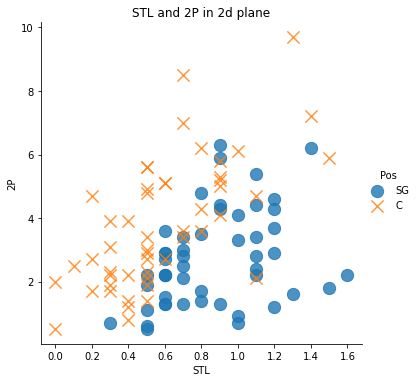

In [6]:
# 스틸, 2섬슛 데이터 시각화
sns.lmplot(x='STL',y='2P', data=df, fit_reg=False, #x축, y축, 데이터, 노 라인
            scatter_kws={"s":150}, # 좌표 상의 점의 크기
            markers=['o', 'x'],
            hue='Pos') # 예측값

# 타이틀
plt.title('STL and 2P in 2d plane')


Text(0.5, 1.0, 'AST and 2P in 2d plane')

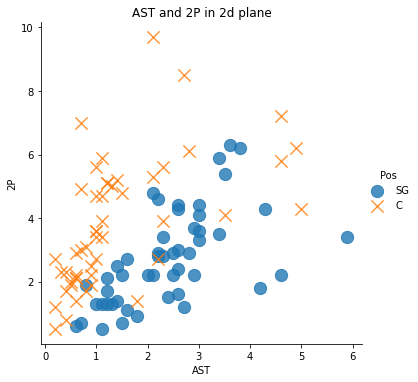

In [7]:
# 어시스트, 2점슛 데이터 시각화
sns.lmplot(x='AST', y='2P', data=df, fit_reg=False,  # x 축, y 축, 데이터, 라인 없음
           scatter_kws={"s": 150}, # 좌표 상의 점의 크기
           markers=["o", "x"],
           hue="Pos") # 예측값

# title
plt.title('AST and 2P in 2d plane')

Text(0.5, 1.0, 'AST and 2P in 2d plane')

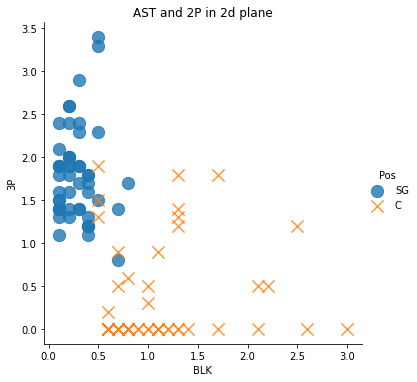

In [8]:
# 블로킹, 3점슛 데이터 시각화
sns.lmplot(x='BLK', y='3P', data=df, fit_reg=False,  # x 축, y 축, 데이터, 라인 없음
           scatter_kws={"s": 150}, # 좌표 상의 점의 크기
           markers=["o", "x"],
           hue="Pos") # 예측값

# title
plt.title('AST and 2P in 2d plane')

Text(0.5, 1.0, 'AST and 2P in 2d plane')

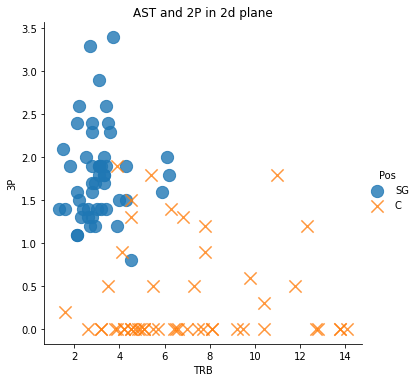

In [9]:
# 리바운드, 3점슛 데이터 시각화
sns.lmplot(x='TRB', y='3P', data=df, fit_reg=False,  # x 축, y 축, 데이터, 라인 없음
           scatter_kws={"s": 150}, # 좌표 상의 점의 크기
           markers=["o", "x"],
           hue="Pos") # 예측값

# title
plt.title('AST and 2P in 2d plane')

# 데이터 다듬기

분별력이 없는 2점슛과 어시스트, 스틸 속성을 데이터에서 제거합니다.

In [10]:
# 분별력이 없는 특징(Feature)을 데이터에서 제거합니다
df.drop(['2P','AST','STL'], axis=1, inplace=True)

In [11]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


# 데이터 나누기

- 머신러닝 모델을 학습할 데이터와 테스트할 데이터로 현재의 데이터를 나눈다
- 사이킷런의 train_set_split을 사용하면 간단하게 학습 데이터와 테스트 데이터로 분리할 수 있다

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# 다듬어진 데이터에서 20%를 테스트 데이터로 분류한다
train, test = train_test_split(df, test_size=0.2)

In [14]:
train.shape

(80, 5)

In [15]:
test.shape

(20, 5)

# 다듬어진 데이터를 파일로 저장하기

In [18]:
import pickle
with open('./data/pkl/basketball_train.pkl', 'wb') as train_data:
    pickle.dump(train, train_data)
    
with open('./data/pkl/basketball_test.pkl', 'wb') as test_data:
    pickle.dump(test, test_data)